# A

$order \in \{-1\}\cap Z^+$

In [35]:
import matplotlib.pyplot as plt
import numpy as np

## import data

#txt = open("./test_A.txt",'r')
txt = open("./A.txt",'r')
# n is the number of samples
n = int(txt.readline().split()[0])
global n
#one dimensional approximation
data = [[None]*n]*2
global data
# quadratic approximation, N is the number of coefficients
N = 3

line_n = 0
for lines in txt:
    data[line_n] = lines.split()
    data[line_n] = [float(x) for x in data[line_n]]
    line_n += 1

txt.close()
print(data)

[[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0], [2.9, 5.7, 4.8, 5.3, 7.1, 7.6, 7.7, 7.6, 9.4, 9.0, 9.6, 10.0, 10.2, 9.7, 8.3, 8.4, 9.0, 8.3, 6.6, 6.7, 4.1]]


In [36]:

# return <x**order1,x**order2> || <y,x**order2> if order1 == -1
def product(order1,order2):
    global data, n
    #x = data[0]; y = data[1]
    sum = 0
    for i in range(n):
        sum += f(i,order1,order2)
    return sum

# if order1 != -1 return f = x(t_num)**order1*x(t_num)**order2 
# if order1 == -1 return f = y(t_num)*x(t_num)**order2 
def f(num,order1,order2):
    global data
    output = 1
    if order1 == -1:
        output *= data[1][num]
    else:
        output *= data[0][num]**order1
    if order2 == -1:
        output *= data[1][num]
    else:
        output *= data[0][num]**order2
    return output

A = np.zeros((N,N))
b = np.zeros(N)
for i in range(N):
    for j in range(N):
        A[i][j] = product(i,j)
    b[i] = product(-1,i)
a = np.linalg.solve(A,b)
print(a)


[ 3.0447205   2.36312936 -0.21472852]


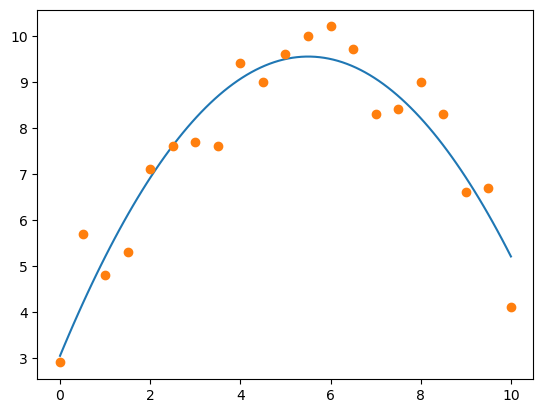

In [38]:
# plot
x = np.linspace(0,10,100)
y = np.zeros(100)
for i in range(N):
    y += a[i]*x**i
plt.plot(x,y)
plt.plot(data[0],data[1],'o')
plt.show()